    Install modules

In [195]:
import seaborn
import rasterio
import numpy as np
import geopandas
import pandas as pd
import numpy.random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
from scipy.ndimage import gaussian_filter
import geopandas as gpd

from rasterio.plot import show

Load crime data data 

In [186]:
df = gpd.read_file('C:/GIS_Course/EGM_722_Programming_for_GIS/ProjectData/crimeData/2022-02/crimeDataEdit.csv') #crime data csv
crime.crs = 'epsg:27700'
crime.head 

<bound method NDFrame.head of         Month         X          Y                    Crime type geometry
0     2022-02  0.908251  52.105755     Criminal damage and arson     None
1     2022-02  0.909954  52.108582     Criminal damage and arson     None
2     2022-02  0.908251  52.105755  Violence and sexual offences     None
3     2022-02  0.906951  52.108225  Violence and sexual offences     None
4     2022-02  0.906951  52.108225  Violence and sexual offences     None
...       ...       ...        ...                           ...      ...
4471  2022-02                       Violence and sexual offences     None
4472  2022-02                       Violence and sexual offences     None
4473  2022-02                       Violence and sexual offences     None
4474  2022-02                       Violence and sexual offences     None
4475  2022-02                       Violence and sexual offences     None

[4476 rows x 5 columns]>

Load parish data

In [183]:
parish = pd.read_file('C:/GIS_Course/EGM_722_Programming_for_GIS/ProjectData/parishBound.csv') #csv with wkt for parish boundaries
parish.crs = 'epsg:27700'
parish.head

<bound method NDFrame.head of                                                    WKT OBJECTID PD_ID  \
0    MULTIPOLYGON (((601704.701 253781.905,601737.4...     1534  MRNG   
1    MULTIPOLYGON (((604662.501 255212.495,604688.3...     1535  MBTT   
2    MULTIPOLYGON (((602301.998 251004.6,602329.998...     1536  MGBR   
3    MULTIPOLYGON (((600038.201 261253.496,600071.0...     1537  MSHE   
4    MULTIPOLYGON (((600928.099 258621.3,600937.004...     1538  MGFI   
..                                                 ...      ...   ...   
772  MULTIPOLYGON (((604662.501 255212.495,604698.3...    28945  MBDL   
773  MULTIPOLYGON (((607822.1 255743.803,607830.303...    28946  MNMN   
774  MULTIPOLYGON (((608122.698 254787.397,608126.4...    28947  MNMS   
775  MULTIPOLYGON (((601334.102 254683.297,601346.8...    28948  MCOM   
776  MULTIPOLYGON (((601208.101 254865.105,601225.5...    28949  MLFI   

             County            Distric_Bo                         Ward  \
0    Suffolk County

Convert dataframe to geodataframe with geometry values

In [201]:
crime = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.X, df.Y))
crime.crs = 'epsg:27700'
crime.head

<bound method NDFrame.head of         Month         X          Y                    Crime type  \
0     2022-02  0.908251  52.105755     Criminal damage and arson   
1     2022-02  0.909954  52.108582     Criminal damage and arson   
2     2022-02  0.908251  52.105755  Violence and sexual offences   
3     2022-02  0.906951  52.108225  Violence and sexual offences   
4     2022-02  0.906951  52.108225  Violence and sexual offences   
...       ...       ...        ...                           ...   
4471  2022-02       NaN        NaN  Violence and sexual offences   
4472  2022-02       NaN        NaN  Violence and sexual offences   
4473  2022-02       NaN        NaN  Violence and sexual offences   
4474  2022-02       NaN        NaN  Violence and sexual offences   
4475  2022-02       NaN        NaN  Violence and sexual offences   

                  geometry  
0     POINT (0.908 52.106)  
1     POINT (0.910 52.109)  
2     POINT (0.908 52.106)  
3     POINT (0.907 52.108)  
4     PO

Test gdf have same crs

In [199]:
print(crime.crs == parish.crs)

True


Display gdf layer

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


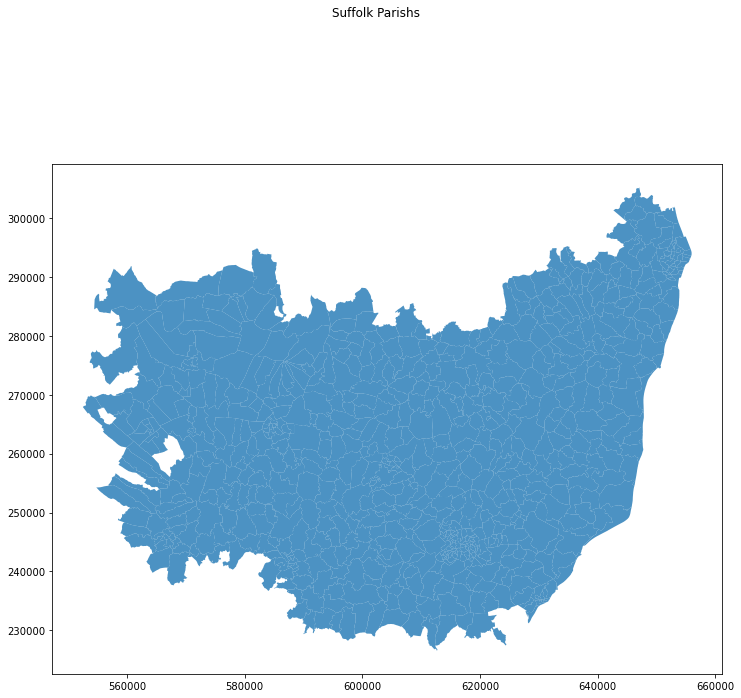

In [179]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = gdf.plot(axes=ax, alpha=0.8) #adjust alpha value to change colour intensity
#ax.set_axis_off()  #uncomment this line to remove national grid numbers
f.suptitle('Suffolk Parishs')
plt.show() 

Load a single parish using row number

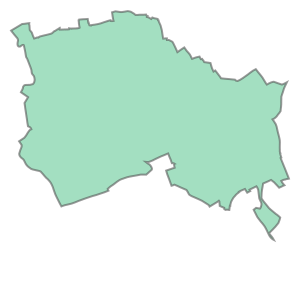

In [175]:
gdf.loc[0, 'geometry'] #adjust number to select parish

Load a basemap

In [148]:
try: #attmept to load a basemap with a guardian pattern to carry on without basemap if not available
    from mpl_toolkits.basemap import Basemap

    basemap = True
except ImportError:
    basemap = False

Plot data to scattergraph

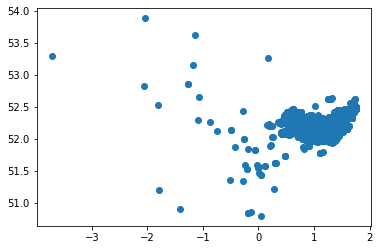

TypeError: Image data of dtype object cannot be converted to float

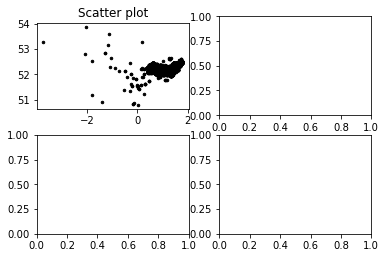

In [192]:
plt.scatter(x=df['X'], y=df['Y']) #plot scatter using csv X,Y columns
plt.show() #show plot

fig, axs = plt.subplots(2, 2)

x = df['X']
y = df['Y']

sigmas = [0, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.plot(x, y, 'k.', markersize=5)
        ax.set_title("Scatter plot")
    else:
        for ax, interp_method in zip(axs.flat, methods):
            ax.imshow(df, interpolation=interp_method, cmap='viridis')
            ax.set_title(str(interp_method))

plt.show()

Join the two tables, crime and parish

In [202]:
join = gpd.sjoin(parish, crime, how='inner', lsuffix='left', rsuffix='right') # perform the spatial join
join # show the joined table

,WKT,OBJECTID,PD_ID,County,Distric_Bo,Ward,Parish,geometry,index_right,Month,X,Y,Crime type
